In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/revealed_test.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


In [10]:
train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
census = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [12]:
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [13]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [14]:
census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [49]:
census_melted = census.melt('cfips')

In [51]:
census_melted['var'] = census_melted['variable'].apply(lambda x: x[:-5])
census_melted['yr'] = census_melted['variable'].apply(lambda x: x[-4:])

In [60]:
census_pivot = census_melted.pivot(index=['cfips', 'yr'], columns=['var'], values='value')

In [77]:
census_pivot.reset_index(inplace=True)

In [74]:
train['id'] = train['row_id'].apply(lambda x: x.split('_')[0])
train['ds'] = train['row_id'].apply(lambda x: x.split('_')[1])

train['id'] = train['id'].astype(int)
train['ds'] = pd.to_datetime(train['ds'])
train['ds'] = train['ds'].apply(lambda x: x.date())

In [75]:
test['id'] = test['row_id'].apply(lambda x: x.split('_')[0])
test['ds'] = test['row_id'].apply(lambda x: x.split('_')[1])

test['id'] = test['id'].astype(int)
test['ds'] = pd.to_datetime(test['ds'])
test['ds'] = test['ds'].apply(lambda x: x.date())

In [76]:
train.dtypes


row_id                    object
cfips                      int64
county                    object
state                     object
first_day_of_month        object
microbusiness_density    float64
active                     int64
id                         int64
ds                        object
dtype: object

In [86]:
train['year'] = train.ds.apply(lambda x: x.year)
test['year'] = test.ds.apply(lambda x: x.year)

In [91]:
census_pivot.yr = census_pivot.yr.astype('int64')

In [93]:
df = train.merge(census_pivot, how='left', left_on=['cfips', 'year'], right_on=['cfips', 'yr'])

In [94]:
test_df = test.merge(census_pivot, how='left', left_on=['cfips', 'year'], right_on=['cfips', 'yr'])

In [95]:
train.shape[0]==df.shape[0]

True

In [96]:
set(df.columns)-set(test_df.columns)

{'active', 'county', 'microbusiness_density', 'state'}

In [97]:
df = df.drop('active', axis=1)

In [103]:
test_df = test_df.set_index('cfips').join(df.set_index('cfips')[['state', 'county']])

In [106]:
test_df.reset_index(inplace=True)

In [107]:
df.describe()

,cfips,microbusiness_density,id,year,yr,median_hh_inc,pct_bb,pct_college,pct_foreign_born,pct_it_workers
count,122265.000000,122265.000000,122265.000000,122265.000000,90915.000000,90891.000000,90915.000000,90915.000000,90915.000000,90915.000000
mean,30376.037640,3.817671,30376.037640,2020.692308,2020.241379,56106.693556,78.841119,14.663204,4.753964,1.300354
std,15143.508721,4.991087,15143.508721,0.991089,0.726601,15057.966689,8.397378,5.785971,5.712313,0.972842
min,1001.000000,0.000000,1001.000000,2019.000000,2019.000000,17109.000000,33.300000,0.000000,0.000000,0.000000
25%,18177.000000,1.639344,18177.000000,2020.000000,2020.000000,46352.000000,74.300000,10.500000,1.400000,0.700000
50%,29173.000000,2.586543,29173.000000,2021.000000,2020.000000,53963.000000,80.000000,13.600000,2.700000,1.200000
75%,45077.000000,4.519231,45077.000000,2022.000000,2021.000000,62865.000000,84.600000,17.900000,5.700000,1.700000
max,56045.000000,284.340030,56045.000000,2022.000000,2021.000000,156821.000000,97.600000,45.400000,54.000000,15.200000


In [108]:
TARGET_COL = 'microbusiness_density'

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [110]:
# !pip install skforecast

/tmp/ipykernel_35/2829143712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

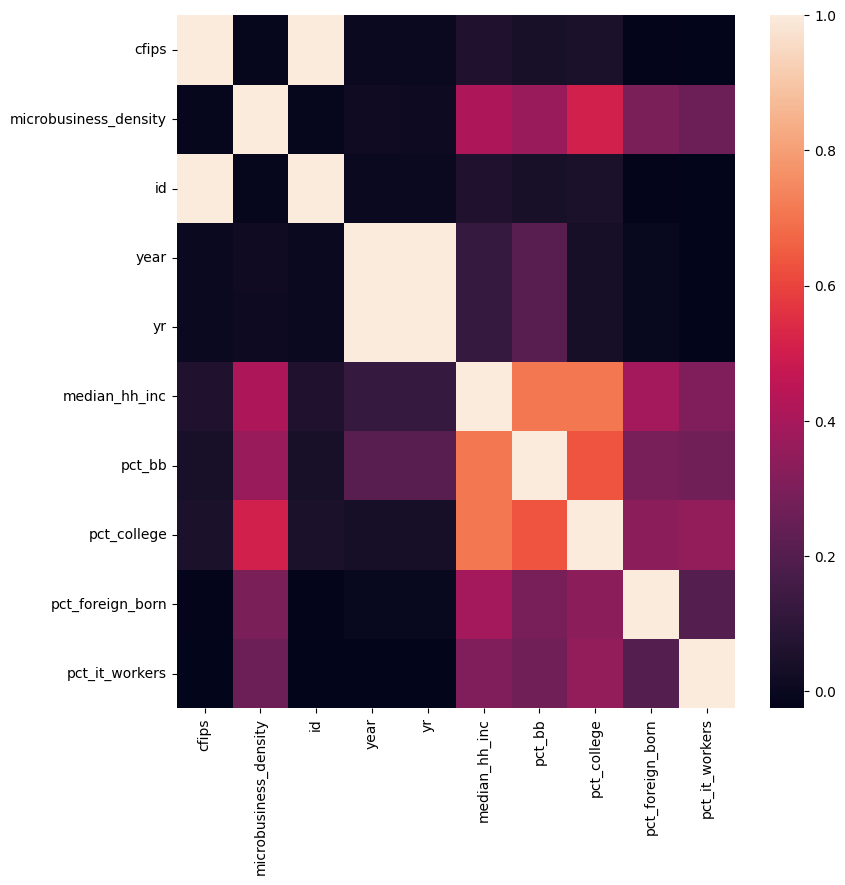

In [111]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())

In [112]:
df['ds'] = pd.to_datetime(df['ds'])

df['year'] = df.ds.dt.year
df['month'] = df.ds.dt.month

In [113]:
test_df['ds'] = pd.to_datetime(test_df['ds'])

test_df['year'] = test_df.ds.dt.year
test_df['month'] = test_df.ds.dt.month

In [114]:
df['state_county'] = df['state']+df['county']

In [118]:
test_df['state_county'] = test_df['state']+test_df['county']

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [42]:
from sklearn.preprocessing import FunctionTransformer

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [44]:
df.state.nunique(), df.county.nunique() 

(51, 1871)

In [45]:
cat_col_transformer = make_column_transformer(
                                              (OneHotEncoder(sparse=False), ['county', 'state']),
                                              (OrdinalEncoder(), ['state_county'])
                                             )


date_col_transformer = make_column_transformer(
    (FunctionTransformer(lambda x: x.dt.day_of_week), ['ds'])
)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X, y = df.drop('microbusiness_density', axis=1), df['microbusiness_density']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)

In [49]:
X_train.select_dtypes(include=object)

,row_id,county,state,first_day_of_month,state_county
3246,2180_2020-05-01,Nome Census Area,Alaska,2020-05-01,AlaskaNome Census Area
7801,6033_2019-09-01,Lake County,California,2019-09-01,CaliforniaLake County
411,1021_2021-05-01,Chilton County,Alabama,2021-05-01,AlabamaChilton County
73874,37015_2020-04-01,Bertie County,North Carolina,2020-04-01,North CarolinaBertie County
17287,13119_2020-06-01,Franklin County,Georgia,2020-06-01,GeorgiaFranklin County
...,...,...,...,...,...
61404,29186_2021-02-01,Ste. Genevieve County,Missouri,2021-02-01,MissouriSte. Genevieve County
17730,13141_2021-08-01,Hancock County,Georgia,2021-08-01,GeorgiaHancock County
28030,18047_2021-12-01,Franklin County,Indiana,2021-12-01,IndianaFranklin County
15725,13037_2020-04-01,Calhoun County,Georgia,2020-04-01,GeorgiaCalhoun County


In [50]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [51]:
pipeline = make_pipeline(cat_col_transformer, 
                         HistGradientBoostingRegressor()
                        )

In [52]:
pipeline.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['county', 'state']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['state_county'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor())])

In [53]:
y_pred = pipeline.predict(X_test)

In [210]:
df.groupby(['cfips'])['ds'].count()

cfips
1001     39
1003     39
1005     39
1007     39
1009     39
         ..
56037    39
56039    39
56041    39
56043    39
56045    39
Name: ds, Length: 3135, dtype: int64

In [55]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
  

In [56]:
y_test.values

array([1.0366992, 4.0527253, 2.3150342, ..., 1.4409713, 1.5797504,
       2.205657 ])

In [57]:
calculate_smape(y_test.values, y_pred)

44.69

In [58]:
from xgboost import XGBRegressor

In [59]:
xgb_pipeline = make_pipeline(cat_col_transformer, 
                         XGBRegressor()
                        )

In [60]:
xgb_pipeline.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['county', 'state']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['state_county'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_round...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [61]:
y_pred_xgb = xgb_pipeline.predict(X_test)

In [62]:
calculate_smape(y_test.values, y_pred_xgb)

44.85

In [80]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap)

In [165]:
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

In [95]:
IDs = list(df.id.unique())

In [98]:
for ID in IDs:
    if df[df.id==ID].shape[0] !=39:
        print(ID)

In [103]:
vals = list(set(df.columns)-{'ds', 'id', 'row_id', 'cfips'})

In [235]:
df_pivot = df.pivot(index=['ds'], columns='id', values=vals)

In [125]:
for ID in IDs:
    if (test[test.cfips==ID].shape[0]!=8):
        print(ID)

In [155]:
dtype_dict = {k:str(v) for k,v in dict(df.dtypes).items()}

In [119]:
data = df_pivot.loc[:, (slice(None), [1001])]

<AxesSubplot: xlabel='ds'>

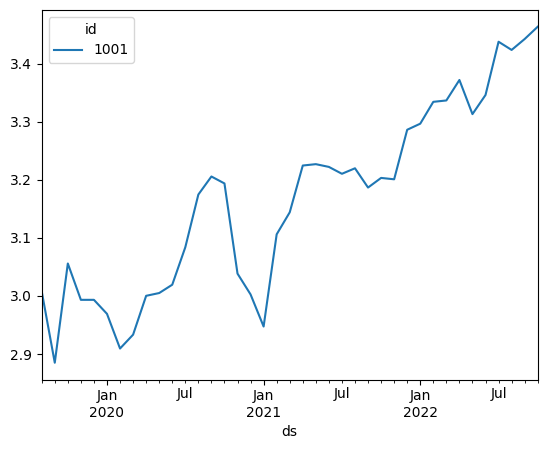

In [121]:
data[TARGET_COL].plot()

In [236]:
end_train = '2021-11-01'
end_val = '2022-06-01'

In [237]:
# df_pivot = df_pivot.convert_dtypes()

In [224]:
# df_pivot.infer_objects()

In [238]:
data = df_pivot.loc[:, (slice(None), [1001])]
data_train = data.loc[:end_train, :].copy()
data_val   = data.loc[end_train:end_val, :].copy()
data_test  = data.loc[end_val:, :].copy()
data = data.droplevel(1, axis=1)

In [239]:
data.index.freq = 'MS'

In [240]:
for k,v in dtype_dict.items():
    if k in data.columns:
        data[k] = data[k].astype(v)

In [ ]:
for 

In [241]:
forecaster_ms = ForecasterAutoregMultiSeries(
                    regressor          = XGBRegressor(random_state=123),
                    lags               = 14,
                    transformer_exog   = cat_col_transformer,

#                     transformer_series = StandardScaler(),
                )

# Backtesting forecaster for all items
multi_series_smape, predictions_ms = backtesting_forecaster_multiseries(
                                       forecaster         = forecaster_ms,
                                       series             = data[[TARGET_COL]],
                                       levels             = TARGET_COL,
                                       exog               = data.drop(TARGET_COL, axis=1),
                                       steps              = 8,
                                       metric             = smape,
                                       initial_train_size = len(data_train) + len(data_val),
                                       refit              = False,
                                       fixed_train_size   = False,
                                       verbose            = True
                                   )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 36
Number of observations used for backtesting: 3
    Number of folds: 1
    Number of steps per fold: 8
    Last fold only includes 3 observations.

Data partition in fold: 0
    Training:   2019-08-01 00:00:00 -- 2022-07-01 00:00:00  (n=36)
    Validation: 2022-08-01 00:00:00 -- 2022-10-01 00:00:00  (n=3)



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
for k,v in dtype_dict.items():
    if k in data.columns:
        data[k] = data[k].astype(v)

In [245]:
for ID in IDs:
    data = df_pivot.loc[:, (slice(None), [ID])]
    data_train = data.loc[:end_train, :].copy()
    data_val   = data.loc[end_train:end_val, :].copy()
    data_test  = data.loc[end_val:, :].copy()
    data = data.droplevel(1, axis=1)
    data.index.freq = 'MS'
    
    for k,v in dtype_dict.items():
        if k in data.columns:
            data[k] = data[k].astype(v)

    forecaster_ms = ForecasterAutoregMultiSeries(
                        regressor          = XGBRegressor(random_state=123),
                        lags               = 14,
                        transformer_exog   = cat_col_transformer,

    #                     transformer_series = StandardScaler(),
                    )

    # Backtesting forecaster for all items
    multi_series_smape, predictions_ms = backtesting_forecaster_multiseries(
                                           forecaster         = forecaster_ms,
                                           series             = data[[TARGET_COL]],
                                           levels             = TARGET_COL,
                                           exog               = data.drop(TARGET_COL, axis=1),
                                           steps              = 8,
                                           metric             = smape,
                                           initial_train_size = len(data_train) + len(data_val),
                                           refit              = False,
                                           fixed_train_size   = False,
                                           verbose            = False
                                       )
    results_dict = {}
    results_dict['predictions'] = predictions_ms
    results_dict['smape'] = multi_series_smape
    results[ID] = results_dict

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

ValueError: `exog` has missing values.

In [184]:

multi_series_smape

,levels,smape
0,microbusiness_density,2.048447
